<a href="https://colab.research.google.com/github/Anik-Adnan/Fundamentals-of-Deep-Learning-of-Neural-Networks/blob/main/Perceptrons_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron- Training

Now that we understand the basics of perceptrons, let's look at **Rosenblatt's iterative algorithm** to train a perceptron.

The goal of training is to **learn the weights w and bias b** such that the perceptron correctly classifies all data points.


**Algorithm Overview:**

1. Initialize weight vector w (and bias b, optionally in homogeneous form)
2. Repeat until all points are classified correctly:
   - Pick a **misclassified point** x_i with true label y_i
   - Update weights using:  
     w_{t+1} = w_t + y_i * x_i
     
**Notes:**
- x_i is a **misclassified data point**
- y_i is the **true label** of x_i
- The "dot" in y_i * x_i here is **not** a dot product, it is **element-wise scalar multiplication**


#Example Dataset

Consider the following 6 data points with their true labels:

| Index | x1 | x2 | y | Homogeneous coordinates |
|-------|----|----|---|------------------------|
| 0     | 1  | 0  | 1 | (1,0,1)               |
| 1     | 3  | 1  | 1 | (3,1,1)               |
| 2     | 4  | 2  | 1 | (4,2,1)               |
| 3     | 0  | 1  | -1| (0,1,1)               |
| 4     | 1  | 6  | -1| (1,6,1)               |
| 5     | 2  | 4  | -1| (2,4,1)               |

Initial weight vector in homogeneous form:

w_0 = (3, -1, 0)

Algebraically: 3x1 - 1x2 = 0

This represents the initial separating line before any updates.


#Initial Classifier
Initial weight vector in homogeneous form:

w_0 = (3, -1, 0)

Algebraically: 3x1 - 1x2 = 0

This represents the initial separating line before any updates.


#Iteration 1
**Misclassified point:** index 5 → x_i = (2,4,1), y_i = -1

Update rule:
w_1 = w_0 + y_i * x_i

Calculation:
w_1 = (3, -1, 0) + (-1) * (2,4,1)
    = (3-2, -1-4, 0-1)
    = (1, -5, -1)

Algebraically: 1x1 - 5x2 = -1


#Iteration 2
**Next update:** algorithm selects next misclassified point

Final weight vector after iteration 2:
w_2 = (5, -3, 0)

Algebraically: 5x1 - 3x2 = 0

- Now the perceptron correctly classifies **all data points**
- The separating line moves in the correct direction with each iteration


#Key Intuition
- Misclassified points drive the **update of the weight vector**
- Each update moves the decision boundary **towards correctly classifying the point**
- Iterative updates continue until **all points are correctly classified**
- Bias is naturally included if homogeneous coordinates are used


- A single perceptron performs **binary classification**
- Multiple perceptrons together can perform **multiclass classification**
- Understanding the **mathematical proof** of convergence can deepen insights

📖 Additional Reading: [Proof of the Perceptron Learning Algorithm](https://en.wikipedia.org/wiki/Perceptron#Convergence_proof)


Iteration 1, Misclassified point 5: Updated weights: [ 1. -5. -1.]


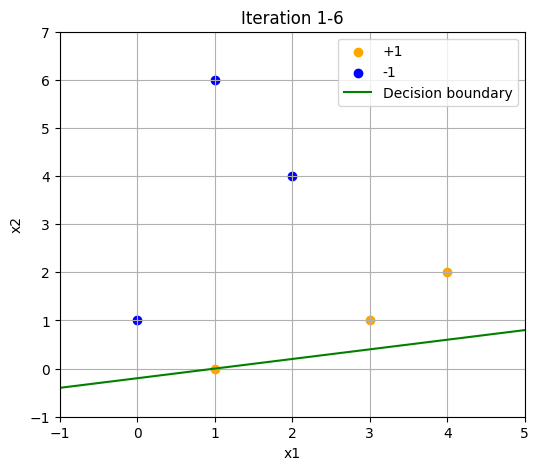

Iteration 2, Misclassified point 0: Updated weights: [ 2. -5.  0.]


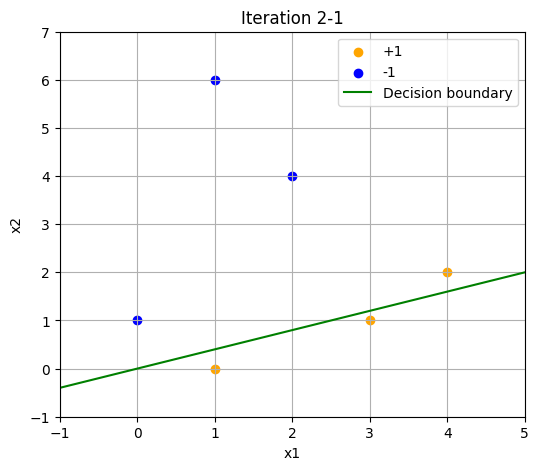

Iteration 2, Misclassified point 2: Updated weights: [ 6. -3.  1.]


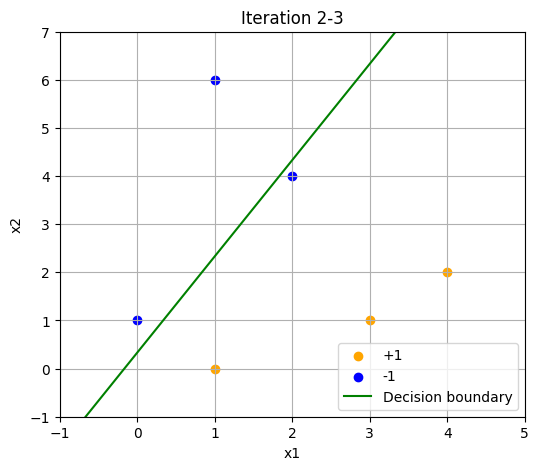

Iteration 2, Misclassified point 5: Updated weights: [ 4. -7.  0.]


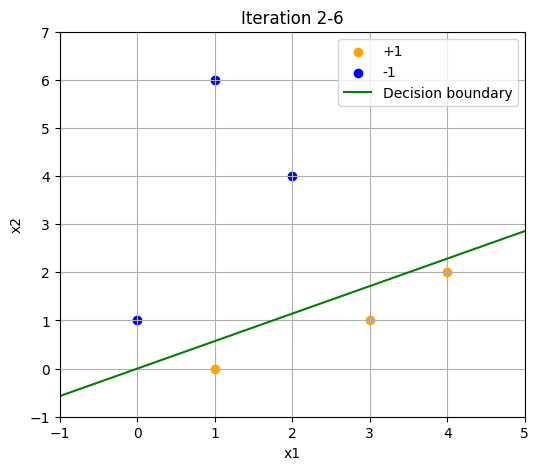

Training complete after 3 iterations.

Final weight vector: [ 4. -7.  0.]


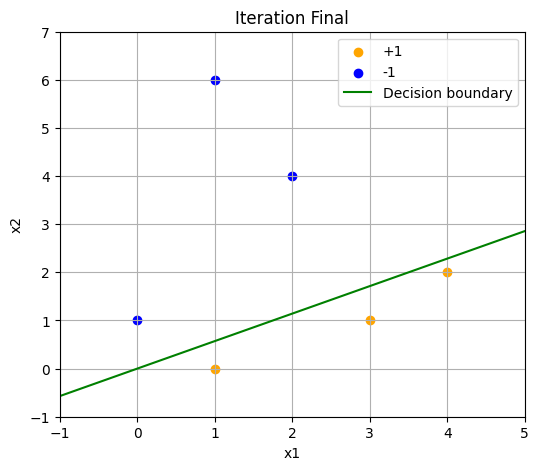

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Dataset (homogeneous coordinates)
# -----------------------------
X = np.array([
    [1, 0, 1],  # x0
    [3, 1, 1],  # x1
    [4, 2, 1],  # x2
    [0, 1, 1],  # x3
    [1, 6, 1],  # x4
    [2, 4, 1],  # x5
])

y = np.array([1, 1, 1, -1, -1, -1])  # labels

# -----------------------------
# Initial weights
# -----------------------------
w = np.array([3, -1, 0], dtype=float)

# -----------------------------
# Plotting function
# -----------------------------
def plot_perceptron(X, y, w, iteration=None):
    plt.figure(figsize=(6,5))

    # Plot data points
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='orange', label='+1')
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='blue', label='-1')

    # Plot decision boundary
    x_vals = np.linspace(-1, 5, 100)
    if w[1] != 0:
        y_vals = -(w[0]*x_vals + w[2])/w[1]
        plt.plot(x_vals, y_vals, 'g-', label='Decision boundary')

    plt.xlim(-1,5)
    plt.ylim(-1,7)
    plt.xlabel('x1')
    plt.ylabel('x2')
    if iteration is not None:
        plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()

# -----------------------------
# Perceptron Training with Plot
# -----------------------------
def perceptron_train_plot(X, y, w, max_iter=10):
    n = X.shape[0]

    for it in range(max_iter):
        errors = 0
        for i in range(n):
            if y[i] * np.dot(w, X[i]) <= 0:
                w = w + y[i] * X[i]
                errors += 1
                print(f"Iteration {it+1}, Misclassified point {i}: Updated weights: {w}")
                plot_perceptron(X, y, w, iteration=f"{it+1}-{i+1}")
        if errors == 0:
            print(f"Training complete after {it+1} iterations.\n")
            break
    return w

# -----------------------------
# Train and plot
# -----------------------------
final_w = perceptron_train_plot(X, y, w)
print("Final weight vector:", final_w)
plot_perceptron(X, y, final_w, iteration='Final')
